In [1]:
%load_ext dotenv
%reload_ext dotenv
%dotenv

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import sys
from os.path import dirname

UTILS_PATH=os.environ.get('REPO') + "/notebooks/commons"
sys.path.append(dirname(UTILS_PATH))

from commons import check_args, gen_paths, coordinates_bounds

In [4]:
def compare_box_plot(df, x, y):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(2,1,1)
    sns.boxplot(data=df, x=x, y=y, ax=ax)

    ax = fig.add_subplot(2,1,2)
    sns.boxplot(data=df, x=x, y=y, ax=ax, showfliers=False)
    
def compare_box_vs_violin_plot(df, x, y):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(2,1,1)
    sns.boxplot(data=df, x=x, y=y, ax=ax, showfliers=False)

    ax = fig.add_subplot(2,1,2)
    sns.violinplot(data=df, x=x, y=y, ax=ax)
    
def compare_box_dist(df, label):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(3,1,1)
    sns.distplot(df[label])

    ax = fig.add_subplot(3,1,2)
    sns.boxplot(df[label], ax=ax)
    
    ax = fig.add_subplot(3,1,3)
    sns.boxplot(df[label], ax=ax, showfliers=False)

In [5]:
def get_normalized_price_by_max(df, price="price"):
    df = df.copy()
    
    df_prices = df[["estrato", price]].groupby("estrato").agg(lambda e: e.max())
    df_prices = df_prices.reset_index()
    df_prices.loc[:, "max_price"] = df_prices[price]
    df_prices = df_prices.drop([price], axis=1)
    
    df_estratos = pd.merge(df_prices, df)
    df_estratos.loc[:, "norm_price_by_max"] = \
        df_estratos.apply(lambda e: e[price]/e["max_price"], axis=1)
    return df_estratos

In [6]:
def upper_interquartile_distance(df):
    q1 = np.quantile(df, .25)
    q3 = np.quantile(df, .75)
    return q3 + 1.5*(q3 - q1)

def get_normalized_price_by_tipical(df, price="price"):
    df = df.copy()
    
    df_prices = df[["estrato", price]].groupby("estrato").agg(upper_interquartile_distance)
    df_prices = df_prices.reset_index()
    df_prices.loc[:, "normal_price"] = df_prices[price]
    df_prices = df_prices.drop([price], axis=1)

    df_estratos = pd.merge(df_prices, df)
    
    df_estratos = df_estratos.loc[df_estratos[price] <= df_estratos["normal_price"]]
    df_estratos.loc[:, "norm_price_by_stat"] = \
        df_estratos.apply(lambda e: e[price]/e["normal_price"], axis=1)

    return df_estratos

In [7]:
def plot_price_vs_discrete_value(df, label, showfliers=True):
    plt.figure(figsize=(16,10))
    features = ['rooms','baths','garages', "antiguedad"]
    for i,f in enumerate(features):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=f ,y=label, data=df, showfliers=showfliers)
        plt.title(f'{f}')

In [8]:
def load_posts(input_path):
    df = pd.read_parquet(input_path)
    return df

In [9]:
if __name__ == "__main__":
    city = "manizales"
    property_type = "casas"
    post_type = "venta"
    
    #city, property_type, post_type = check_args()
    base_path = os.environ.get('REPO')
    
    raw_path, clean_path = gen_paths(city, property_type, post_type)
    
    raw_path = base_path + raw_path
    clean_path = base_path + clean_path

In [10]:
MSG = """
Hay {} publicaciones de {} en total
"""

posts = load_posts(clean_path)
print(MSG.format(posts.shape[0], post_type))
posts.head()


Hay 1992 publicaciones de venta en total



,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,estrato,antiguedad,fid,city,property_type,post_type,price_m2
1,180.0,4.0,1.0,1.0,250.0,5.061220,"Casa ubicada en el barrio La Sultana, consta d...",-75.472801,Manizales LA SULTANA,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,3.0,16 a 30,5151631,manizales,casas,venta,1.388889
2,130.0,4.0,2.0,0.0,225.0,5.047913,"Area de 130 mtrs, excelente ubicacion, casa co...",-75.501884,Manizales MALHABAR,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,3.0,16 a 30,4715541,manizales,casas,venta,1.730769
3,407.0,9.0,6.0,5.0,1200.0,5.069806,"Excelente inversion, venta de propiedad horizo...",-75.530762,Manizales La francia,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,6.0,desconocido,3333614,manizales,casas,venta,2.948403
4,118.0,3.0,3.0,1.0,450.0,5.027654,Vista Inmobiliaria ofrece en venta linda casa ...,-75.481209,Manizales La Florida,https://www.fincaraiz.com.co/casa-en-venta/man...,285000.0,4.0,desconocido,5392228,manizales,casas,venta,3.813559
5,115.0,3.0,3.0,2.0,370.0,5.038804,Venta casa en conjunto cerrado en el sector de...,-75.487785,Manizales La Florida,https://www.fincaraiz.com.co/casa-en-venta/man...,220000.0,4.0,1 a 8,5613118,manizales,casas,venta,3.217391


### Distribución variables continuas

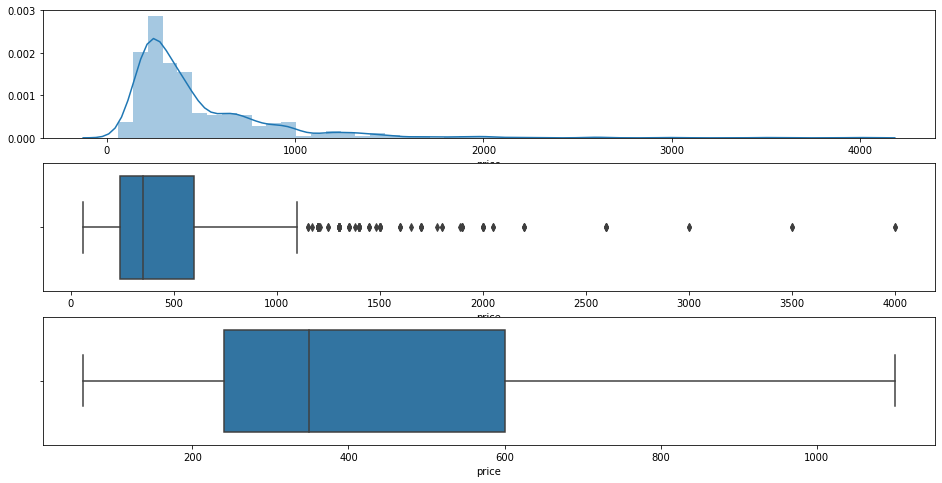

In [11]:
compare_box_dist(posts, "price")

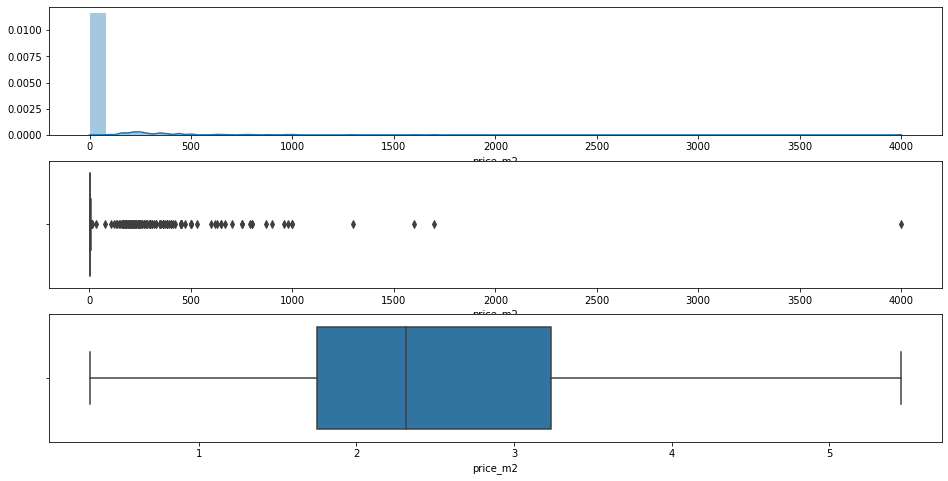

In [12]:
compare_box_dist(posts, "price_m2")

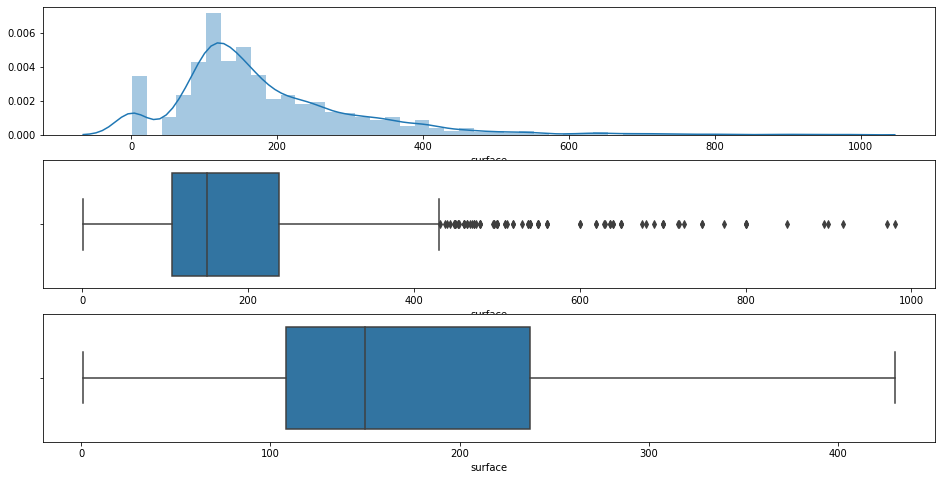

In [13]:
compare_box_dist(posts, "surface")

### Distribución precio por varibles discreta

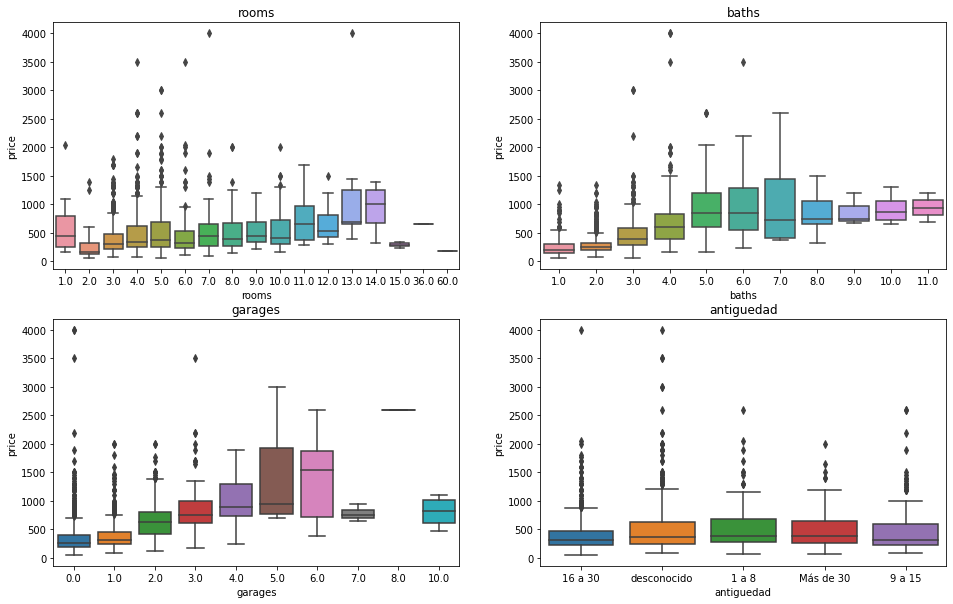

In [14]:
plot_price_vs_discrete_value(posts, "price")

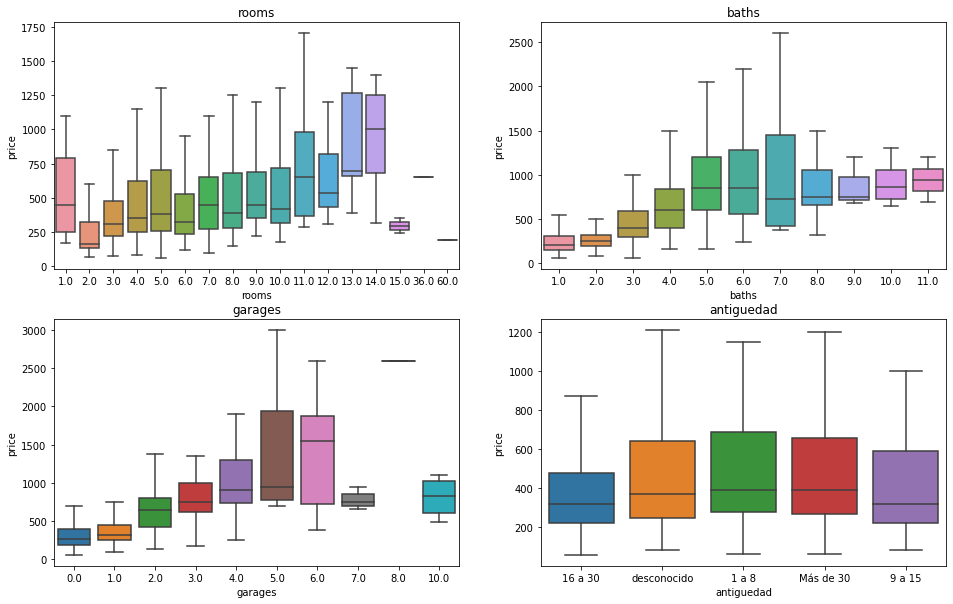

In [15]:
plot_price_vs_discrete_value(posts, "price", showfliers=False)

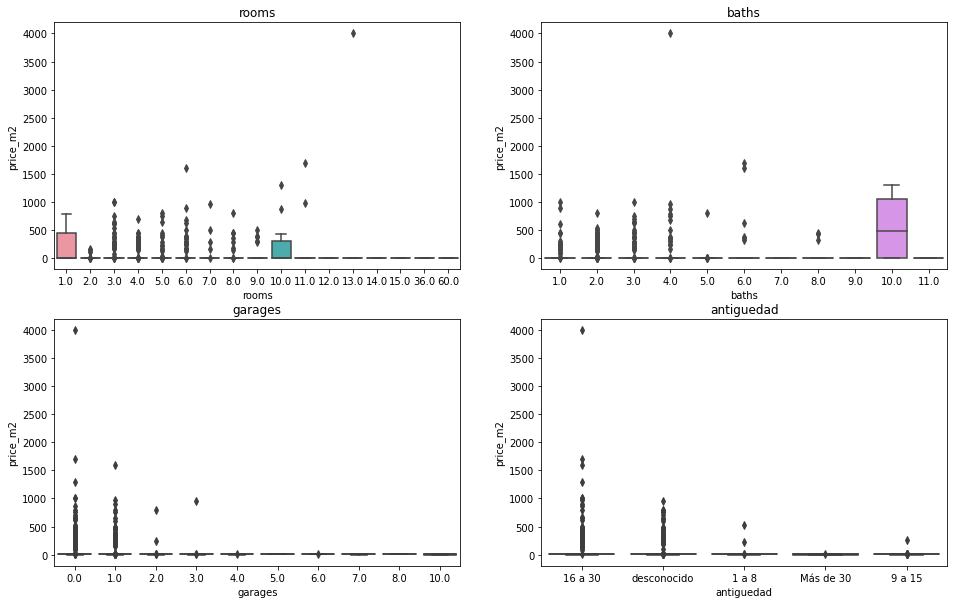

In [16]:
plot_price_vs_discrete_value(posts, "price_m2")

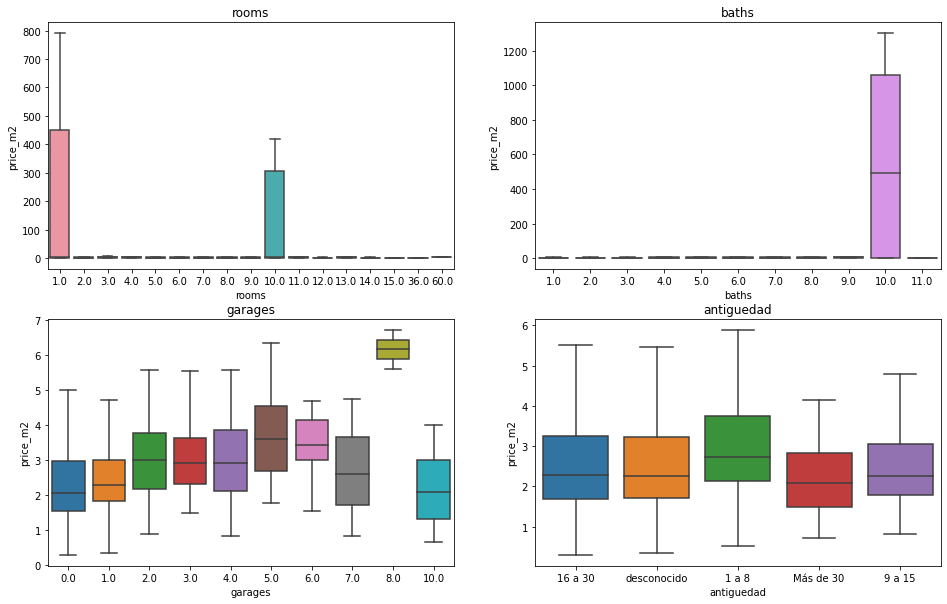

In [17]:
plot_price_vs_discrete_value(posts, "price_m2", showfliers=False)

,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2
estrato,,,,,,,,,,,,,,,,,
1.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
2.0,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154,154
3.0,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715
4.0,464,464,464,464,464,464,464,464,464,464,464,464,464,464,464,464,464
5.0,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177,177
6.0,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465


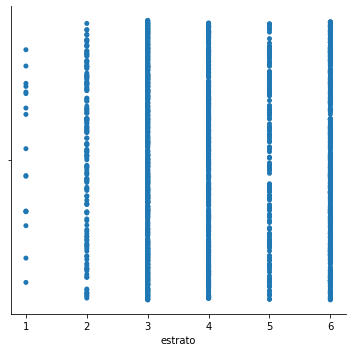

In [18]:
## Numero de muestras por estrato

sns.catplot(data=posts, x="estrato")
posts.groupby("estrato").count()

### Distribución del precio discriminado por estrato

Se verifica la forma del histograma de las variables continuas clasificadas por estrato

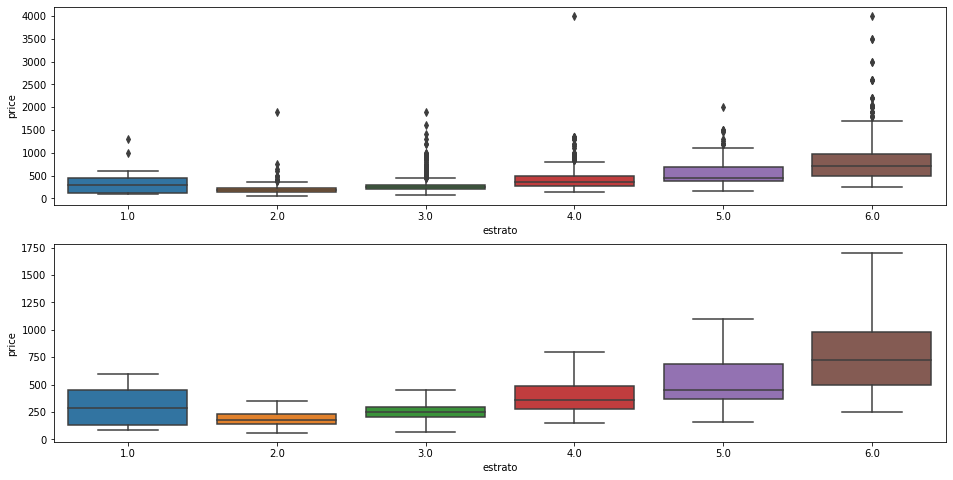

In [19]:
compare_box_plot(posts, "estrato", "price")

#### Se normalizan los precion por estrato

La idea es observar si la distribución de los precios es similar entre los estratos luego de normalizar los precios

In [20]:
normalized_price = get_normalized_price_by_max(posts)
normalized_price.head()

,estrato,max_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_max
0,1.0,1300.0,980.0,3.0,2.0,0.0,500.0,5.070232,Inmobiliaria Giraldo Castaño te ofrece la opor...,-75.513733,Manizales LA CABAA,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,1 a 8,4624458,manizales,casas,venta,0.510204,0.384615
1,1.0,1300.0,60.0,3.0,1.0,0.0,90.0,5.052857,VENTA DE CASA EN SAN SEBASTIAN Casa de 2 nivel...,-75.488037,Manizales San sebastian,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,5411033,manizales,casas,venta,1.500000,0.069231
2,1.0,1300.0,1.0,1.0,8.0,0.0,450.0,5.063458,CASA Estrato: Nro. Cuartos: 8 Nro. Baños: 6 Nr...,-75.501266,Manizales Avenida paralela,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,4630099,manizales,casas,venta,450.000000,0.346154
3,1.0,1300.0,1.0,9.0,3.0,0.0,295.0,5.090431,"Venta de casa campestre en La Linda, Manizales...",-75.543533,Manizales La linda,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,4630120,manizales,casas,venta,295.000000,0.226923
4,1.0,1300.0,340.0,4.0,4.0,2.0,1300.0,5.036670,"Casa en sector exclusivo de la ciudad, con exc...",-75.469238,Manizales alhambra,https://www.fincaraiz.com.co/casa-en-venta/man...,616000.0,9 a 15,5652021,manizales,casas,venta,3.823529,1.000000


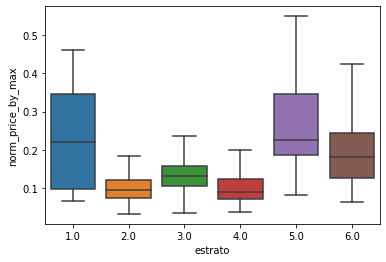

In [21]:
sns.boxplot(data=normalized_price, x="estrato", y="norm_price_by_max", showfliers=False)

#### Se normalizan los precios descartando valores atipicos

Se prueba normalizando sin los valores atipicos

In [22]:
normalized_price = get_normalized_price_by_tipical(posts)
normalized_price.head()

,estrato,normal_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_stat
0,1.0,934.5,980.0,3.0,2.0,0.0,500.0,5.070232,Inmobiliaria Giraldo Castaño te ofrece la opor...,-75.513733,Manizales LA CABAA,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,1 a 8,4624458,manizales,casas,venta,0.510204,0.535045
1,1.0,934.5,60.0,3.0,1.0,0.0,90.0,5.052857,VENTA DE CASA EN SAN SEBASTIAN Casa de 2 nivel...,-75.488037,Manizales San sebastian,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,5411033,manizales,casas,venta,1.500000,0.096308
2,1.0,934.5,1.0,1.0,8.0,0.0,450.0,5.063458,CASA Estrato: Nro. Cuartos: 8 Nro. Baños: 6 Nr...,-75.501266,Manizales Avenida paralela,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,4630099,manizales,casas,venta,450.000000,0.481541
3,1.0,934.5,1.0,9.0,3.0,0.0,295.0,5.090431,"Venta de casa campestre en La Linda, Manizales...",-75.543533,Manizales La linda,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,4630120,manizales,casas,venta,295.000000,0.315677
5,1.0,934.5,150.0,2.0,1.0,1.0,90.0,5.056091,90millones negociable 150 metros cuadrados con...,-75.531410,Manizales vereda arenillo,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,5560973,manizales,casas,venta,0.600000,0.096308


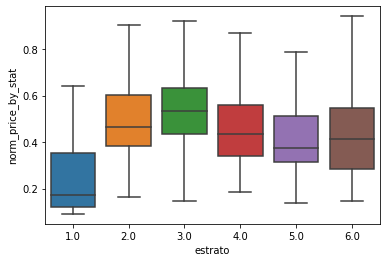

In [23]:
sns.boxplot(data=normalized_price, x="estrato", y="norm_price_by_stat", showfliers=False)

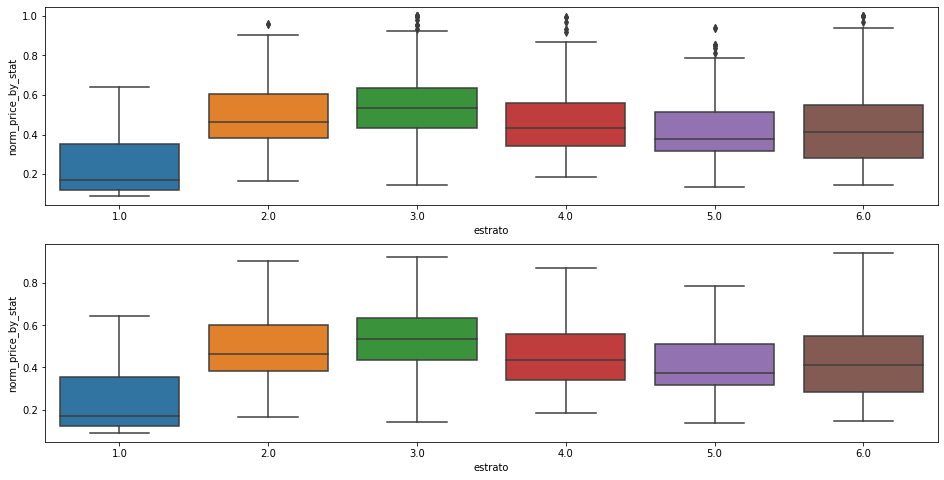

In [24]:
compare_box_plot(normalized_price, "estrato", "norm_price_by_stat")

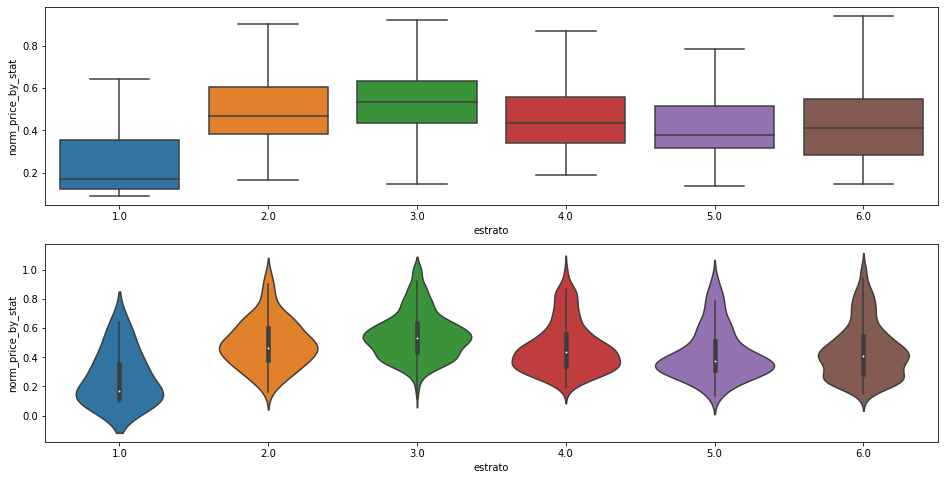

In [25]:
compare_box_vs_violin_plot(normalized_price, "estrato", "norm_price_by_stat")

### Distribución del precio del metro cuadrado discriminado por estrato

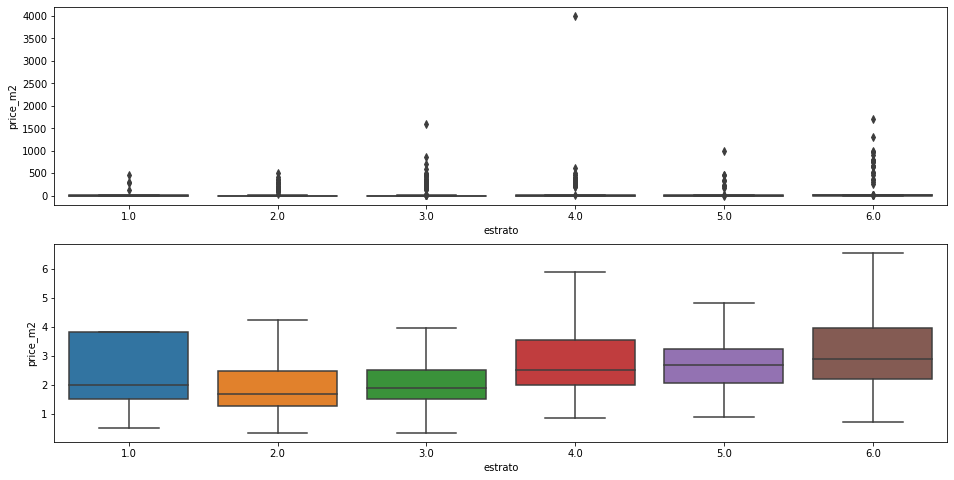

In [26]:
compare_box_plot(posts, "estrato", "price_m2")

#### Se normalizan los precion por estrato

La idea es observar si la distribución de los precios es similar entre los estratos luego de normalizar los precios

In [27]:
normalized_price_m2 = get_normalized_price_by_max(posts, price="price_m2")
normalized_price_m2.head()

,estrato,max_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_max
0,1.0,450.0,980.0,3.0,2.0,0.0,500.0,5.070232,Inmobiliaria Giraldo Castaño te ofrece la opor...,-75.513733,Manizales LA CABAA,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,1 a 8,4624458,manizales,casas,venta,0.510204,0.001134
1,1.0,450.0,60.0,3.0,1.0,0.0,90.0,5.052857,VENTA DE CASA EN SAN SEBASTIAN Casa de 2 nivel...,-75.488037,Manizales San sebastian,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,5411033,manizales,casas,venta,1.500000,0.003333
2,1.0,450.0,1.0,1.0,8.0,0.0,450.0,5.063458,CASA Estrato: Nro. Cuartos: 8 Nro. Baños: 6 Nr...,-75.501266,Manizales Avenida paralela,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,4630099,manizales,casas,venta,450.000000,1.000000
3,1.0,450.0,1.0,9.0,3.0,0.0,295.0,5.090431,"Venta de casa campestre en La Linda, Manizales...",-75.543533,Manizales La linda,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,4630120,manizales,casas,venta,295.000000,0.655556
4,1.0,450.0,340.0,4.0,4.0,2.0,1300.0,5.036670,"Casa en sector exclusivo de la ciudad, con exc...",-75.469238,Manizales alhambra,https://www.fincaraiz.com.co/casa-en-venta/man...,616000.0,9 a 15,5652021,manizales,casas,venta,3.823529,0.008497


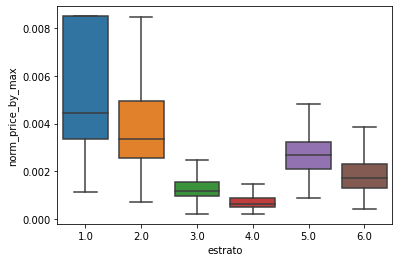

In [28]:
sns.boxplot(data=normalized_price_m2, x="estrato", y="norm_price_by_max", showfliers=False)

#### Se normalizan los precios descartando valores atipicos

Se prueba normalizando sin los valores atipicos

In [29]:
normalized_price_m2 = get_normalized_price_by_tipical(posts, price="price_m2")
normalized_price_m2.head()

,estrato,normal_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_stat
0,1.0,7.308824,980.0,3.0,2.0,0.0,500.0,5.070232,Inmobiliaria Giraldo Castaño te ofrece la opor...,-75.513733,Manizales LA CABAA,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,1 a 8,4624458,manizales,casas,venta,0.510204,0.069807
1,1.0,7.308824,60.0,3.0,1.0,0.0,90.0,5.052857,VENTA DE CASA EN SAN SEBASTIAN Casa de 2 nivel...,-75.488037,Manizales San sebastian,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,5411033,manizales,casas,venta,1.500000,0.205231
4,1.0,7.308824,340.0,4.0,4.0,2.0,1300.0,5.036670,"Casa en sector exclusivo de la ciudad, con exc...",-75.469238,Manizales alhambra,https://www.fincaraiz.com.co/casa-en-venta/man...,616000.0,9 a 15,5652021,manizales,casas,venta,3.823529,0.523139
5,1.0,7.308824,150.0,2.0,1.0,1.0,90.0,5.056091,90millones negociable 150 metros cuadrados con...,-75.531410,Manizales vereda arenillo,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,desconocido,5560973,manizales,casas,venta,0.600000,0.082093
6,1.0,7.308824,375.0,5.0,5.0,10.0,1000.0,5.042483,Inmobiliaria Giraldo Castaño te ofrece la opor...,-75.514603,Manizales VILLAMARIA,https://www.fincaraiz.com.co/casa-en-venta/man...,0.0,9 a 15,4607626,manizales,casas,venta,2.666667,0.364856


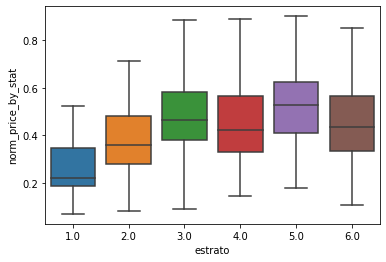

In [30]:
sns.boxplot(data=normalized_price_m2, x="estrato", y="norm_price_by_stat", showfliers=False)

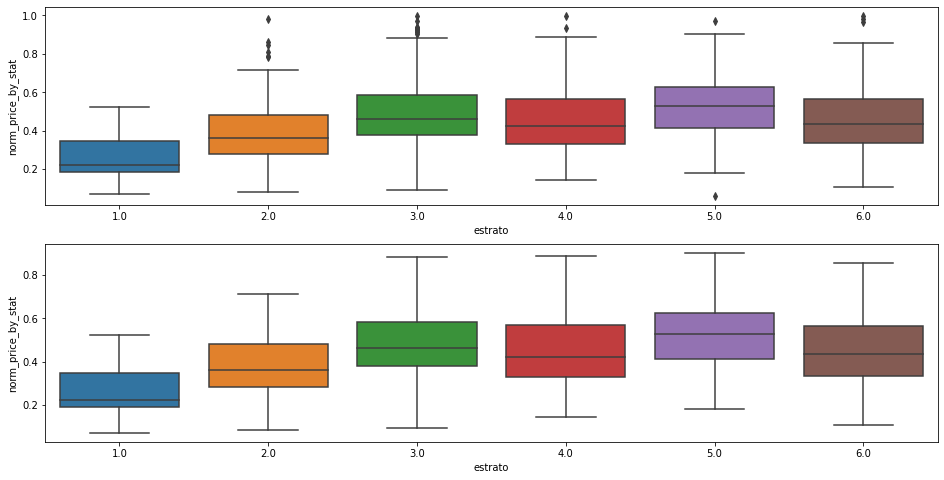

In [31]:
compare_box_plot(normalized_price_m2, "estrato", "norm_price_by_stat")

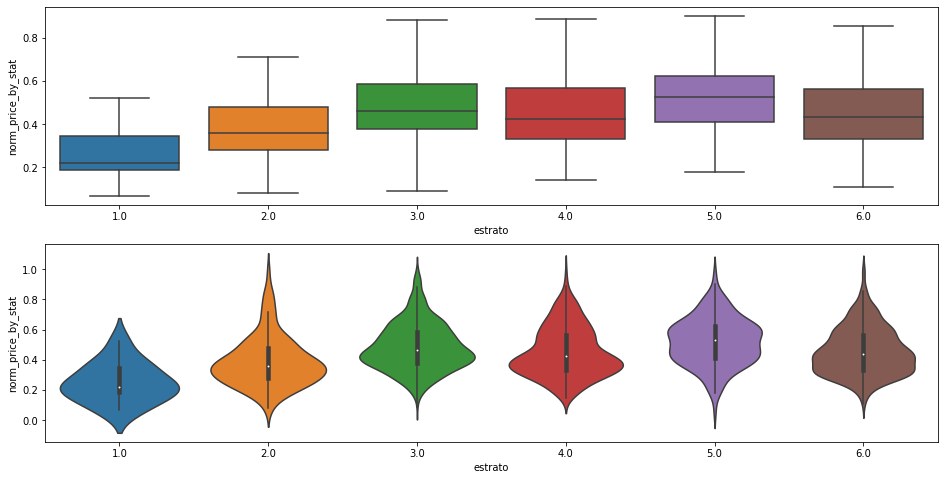

In [32]:
compare_box_vs_violin_plot(normalized_price_m2, "estrato", "norm_price_by_stat")